# <span style="color:red"> NSL Esercitazione 11 </span>
### <span style="color:pink">  Giacomo Boringhieri 13457A</span>

Lo scopo di questa esercitazione è avvicinarsi all'utilizzo delle Reti Neurali affotando un porblema di regressione lineare su dati rumorosi

## <span style="color:blue">  Esercizio 4.1</span>

Inizio testando il fit lineare di una funzione lineare semplice
$$
f(x) = 2x +1
$$

Definisco i paramentri della funzione

In [3]:
# Paramentri target per f(x) = m * x + q
m = 2 # solpe
q = 1 # intersect

Set di dati input che si scostano dal comportamento ideale tramite introduzione di rumore
import numpy as np

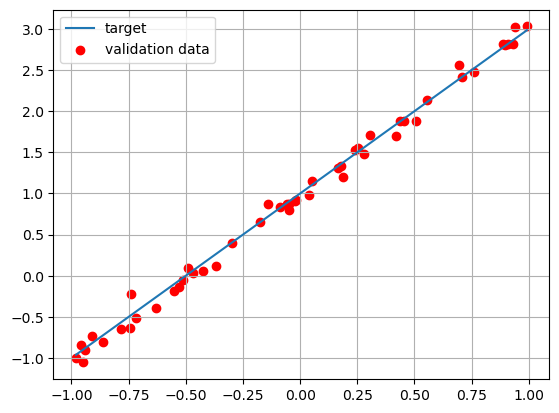

In [4]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 1000)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + q # ideal (target) linear function

sigma = 0.1 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + q, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + q, sigma)
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

Per iniziare *creo* un modello a un neurone

In [7]:
# Debaggare
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model1 = tf.keras.Sequential()
model1.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer='sgd', loss='mse', metrics=['mse'])

# get a summary of our composed model
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Ora devo *allenare* questo modello: gli do in pasto coppie di x e y (_train), lui ottimizza con la loss function Mean Square Error

In [8]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=30,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/30
32/32 [==============================] - 0s 3ms/step - loss: 2.1140 - mse: 2.1140 - val_loss: 1.5339 - val_mse: 1.5339
Epoch 2/30
32/32 [==============================] - 0s 814us/step - loss: 1.1634 - mse: 1.1634 - val_loss: 0.9181 - val_mse: 0.9181
Epoch 3/30
32/32 [==============================] - 0s 747us/step - loss: 0.6993 - mse: 0.6993 - val_loss: 0.5863 - val_mse: 0.5863
Epoch 4/30
32/32 [==============================] - 0s 728us/step - loss: 0.4436 - mse: 0.4436 - val_loss: 0.3825 - val_mse: 0.3825
Epoch 5/30
32/32 [==============================] - 0s 720us/step - loss: 0.2862 - mse: 0.2862 - val_loss: 0.2539 - val_mse: 0.2539
Epoch 6/30
32/32 [==============================] - 0s 912us/step - loss: 0.1879 - mse: 0.1879 - val_loss: 0.1703 - val_mse: 0.1703
Epoch 7/30
32/32 [==============================] - 0s 746us/step - loss: 0.1247 - mse: 0.1247 - val_loss: 0.1161 - val_mse: 0.1161
Epoch 8/30
32/32 [==============================] - 0s 716us/step - loss: 0.08

Verifico la correttezza del fit guardando pesi e bias: $\omega_1 = m$ e $b$ è l'intercetta 

In [9]:
# return weights and biases
model1.get_weights()

[array([[1.9919518]], dtype=float32), array([1.0031796], dtype=float32)]

Ora testo il modello sul set che abbiamo usato per trainarlo (validation set)

In [11]:
# evaluate model
score = model1.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 2ms/step - loss: 0.0085 - mse: 0.0085

Test loss: 0.008522199466824532
Test accuracy: 0.008522198535501957


Ora ivece sulla retta (true value)

In [10]:
# evaluate model with the exact curve
score = model1.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 2ms/step - loss: 3.5000e-05 - mse: 3.5000e-05

Test loss: 3.500043021631427e-05
Test accuracy: 3.500043021631427e-05


Plotto la training history

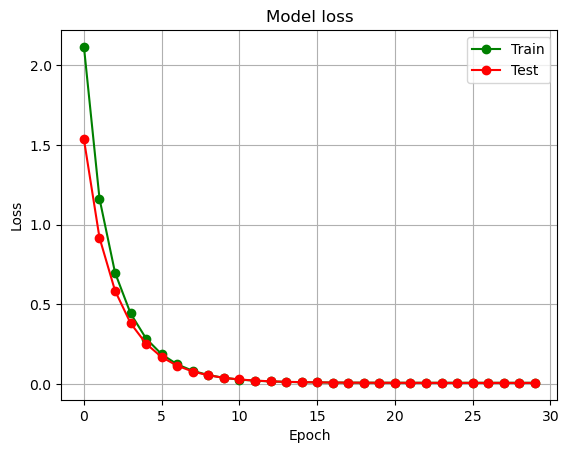

In [12]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'], 'go-')
plt.plot(history.history['val_loss'], 'ro-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid('true')
plt.show()

Da quato andamento posso verificare di non incorrere nel bias variance trade off: rischio che impari troppo bene i dati che gli ho dato e non il modello che dovrebbe capire, andando in overfitting

vediamo ora i dati che predice il modello

4/4 [==============================] - 0s 597us/step


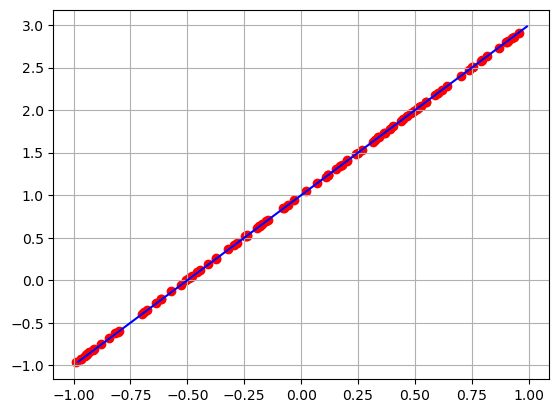

In [13]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model1.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r',label="Model prediction")
plt.plot(x_valid, y_target, color='b',label="Target function")
plt.grid(True)
plt.show()

ho usato una rete neurale molto semplice ma nonostante ciò il modello ha fittato bene.

Usare modelli più complessi non portebbe a niente di meglio, rischieremmo solamente di andare in overfitting

## <span style="color:RED"> Exercise 11.2 </span>

Usando le idee del modello precendente volgio fittare una funzione più complessa:
$$
f(x) = 4 - 3x - 2x^2 + 3x^3
$$

dove $x \in [-1,1]$.

Data la maggiore complessità della task apliamo il set di training e di test. 
Facendo sempre attenzione a evitare l'overfitting


Creo dati con rumore:

In [37]:
import numpy as np
import random

# generate training inputs
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = 4 - 3 *  x_valid - 2 *  x_valid *  x_valid + 3 *  x_valid *  x_valid * x_valid  # ideal (target) linear function

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(4 - 3 * x_train - 2 * x_train * x_train + 3 * x_train * x_train *x_train  , sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(4 - 3 * x_valid - 2 * x_valid * x_valid + 3 * x_valid * x_valid* x_valid , sigma)

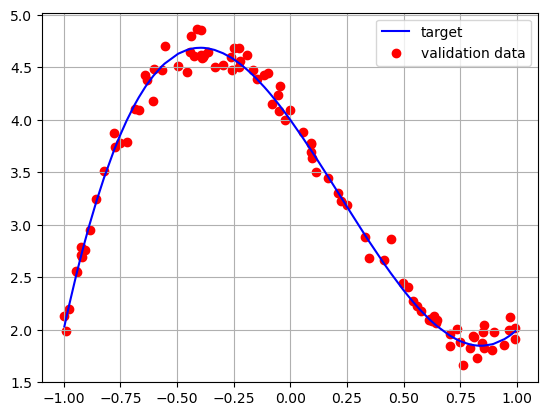

In [38]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target', color='b')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

Creo modello:

La struttura della rete neurale è stata potenziata rispetto all'impostazione precedente. Nel dettaglio, è stato incrementato il numero di strati (layer) ed è stata applicata una funzione di attivazione ReLU, che introduce non linearità nel modello, migliorandone le capacità di apprendimento. Si è inoltre optato per un aumento del numero di neuroni per strato, poiché una configurazione troppo esigua si era rivelata inefficace. Per l'addestramento della rete è stato selezionato l'ottimizzatore "Discesa del Gradiente Stocastica" (SGD).

In [39]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,))
# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse']) 

In [40]:
# get a summary of our composed model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 2         
                                                                 
 dense_21 (Dense)            (None, 32)                64        
                                                                 
 dense_22 (Dense)            (None, 16)                528       
                                                                 
 dense_23 (Dense)            (None, 8)                 136       
                                                                 
 dense_24 (Dense)            (None, 1)                 9         
                                                                 
Total params: 739
Trainable params: 739
Non-trainable params: 0
_________________________________________________________________


Fitto il mio modello in 50 epoche

In [41]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
313/313 [==============================] - 0s 575us/step - loss: 1.0406 - mse: 1.0406 - val_loss: 0.6114 - val_mse: 0.6114
Epoch 2/50
313/313 [==============================] - 0s 373us/step - loss: 0.3476 - mse: 0.3476 - val_loss: 0.1949 - val_mse: 0.1949
Epoch 3/50
313/313 [==============================] - 0s 370us/step - loss: 0.0754 - mse: 0.0754 - val_loss: 0.0489 - val_mse: 0.0489
Epoch 4/50
313/313 [==============================] - 0s 371us/step - loss: 0.0276 - mse: 0.0276 - val_loss: 0.0311 - val_mse: 0.0311
Epoch 5/50
313/313 [==============================] - 0s 370us/step - loss: 0.0191 - mse: 0.0191 - val_loss: 0.0168 - val_mse: 0.0168
Epoch 6/50
313/313 [==============================] - 0s 371us/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0167 - val_mse: 0.0167
Epoch 7/50
313/313 [==============================] - 0s 372us/step - loss: 0.0148 - mse: 0.0148 - val_loss: 0.0157 - val_mse: 0.0157
Epoch 8/50
313/313 [==============================] - 0s 369us

In [42]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 665us/step - loss: 0.0139 - mse: 0.0139

Test loss: 0.01390940509736538
Test accuracy: 0.01390940509736538


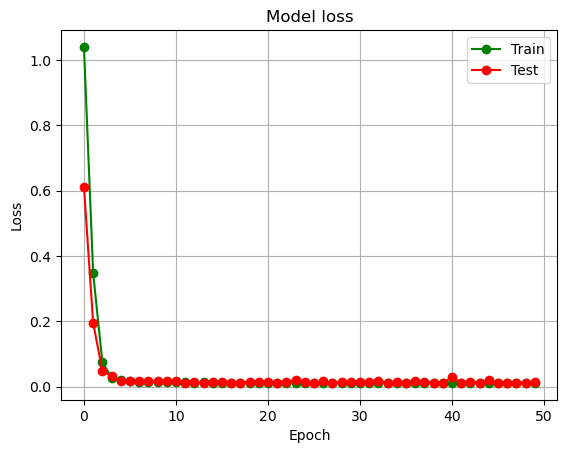

In [43]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'], 'go-')
plt.plot(history.history['val_loss'], 'ro-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid('true')
plt.show()

4/4 [==============================] - 0s 528us/step


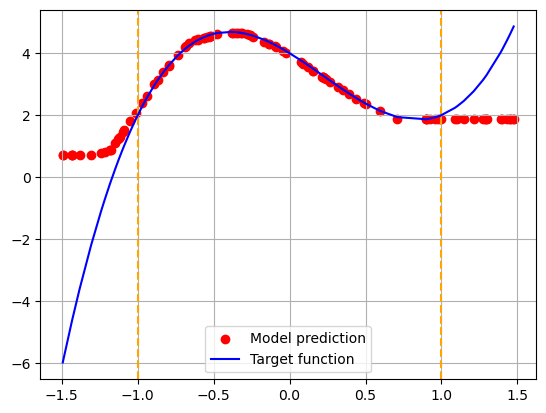

In [44]:
x_predicted = np.random.uniform(-1.5, 1.5, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label= "Model prediction")
plt.axvline(1., color = 'orange', linestyle = '--')
plt.axvline(-1., color = 'orange', linestyle = '--')
x_predicted.sort()
y_target_ext = 4 - 3 *  x_predicted - 2 *  x_predicted *  x_predicted + 3 *  x_predicted *  x_predicted * x_predicted 
plt.plot(x_predicted, y_target_ext, color='b',label="Target function")
plt.grid(True)
plt.legend()
plt.show()

## <span style="color:RED"> Exercise 11.2 </span>

Estendo ulteriormente il modello per effettuare il fit di una semplice funzione 2D $f(x,y) = \sin(x^2+y^2)$ dove $x \in [-3/2,3/2]$ e $y \in [-3/2,3/2]$.

Di conseguenza aumento il numero di dati del set di training e di test.

Il procedimento che utilizzo è il medesimo, ho mantenuto una struttura della rete simile ai casi precedenti. Ho tuttavia modificato l'ottimizzatore: al posto di quello basato sull'algoritmo di stochastic gradient descent, si è utilizzato "adam".

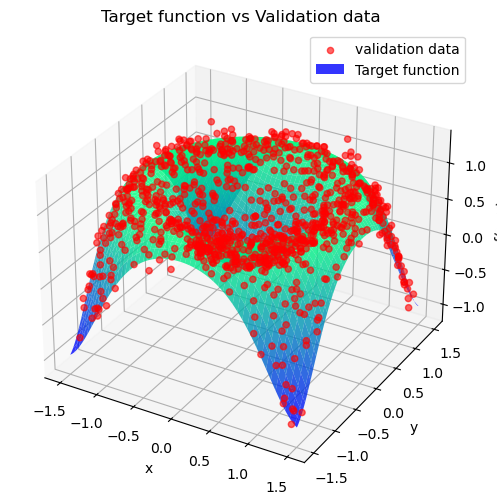

In [59]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(low=-3./2, high=3./2, size=(10000, 2))
x_valid = np.random.uniform(low=-3./2, high=3./2, size=(1000, 2))
#x_valid.sort
y_target = np.sin(x_valid[:, 0]**2 + x_valid[:, 1]**2)

sigma = 0.1 # noise standard deviation
y_train = np.random.normal(np.sin(x_train[:, 0]**2 + x_train[:, 1]**2), scale=sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(np.sin(x_valid[:, 0]**2 + x_valid[:, 1]**2), scale=sigma)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Coordinate
x = x_valid[:, 0]
y = x_valid[:, 1]
z_target = y_target
z_valid = y_valid

# Plot 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

#ax.scatter(x, y, z_target,color="blue", label='target', alpha=0.6)
ax.scatter(x, y, z_valid, color='red', label='validation data', alpha=0.6, s=20)

# 1. Crea griglia regolare
x_grid = np.linspace(min(x), max(x), 100)
y_grid = np.linspace(min(y), max(y), 100)
X, Y = np.meshgrid(x_grid, y_grid)
Z = np.sin(X**2 + Y**2)
surf = ax.plot_surface(X, Y, Z, cmap='winter', edgecolor='none', alpha=0.8, label="Target function")
ax.legend(['Target surface'])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Target function vs Validation data')
ax.legend()
plt.show()

In [60]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model1 = tf.keras.Sequential()
model1.add(Dense(32, input_shape=(2,), activation='relu'))
model1.add(Dense(16,  activation='relu'))
model1.add(Dense(1,))

# compile the model choosing optimizer, loss and metrics objects
model1.compile(optimizer='adam', loss='mse', metrics=['mse']) 

In [61]:
# get a summary of our composed model
model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 32)                96        
                                                                 
 dense_35 (Dense)            (None, 16)                528       
                                                                 
 dense_36 (Dense)            (None, 1)                 17        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [62]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=20,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/20
313/313 [==============================] - 0s 650us/step - loss: 0.2064 - mse: 0.2064 - val_loss: 0.1398 - val_mse: 0.1398
Epoch 2/20
313/313 [==============================] - 0s 418us/step - loss: 0.1149 - mse: 0.1149 - val_loss: 0.0918 - val_mse: 0.0918
Epoch 3/20
313/313 [==============================] - 0s 422us/step - loss: 0.0694 - mse: 0.0694 - val_loss: 0.0539 - val_mse: 0.0539
Epoch 4/20
313/313 [==============================] - 0s 460us/step - loss: 0.0389 - mse: 0.0389 - val_loss: 0.0281 - val_mse: 0.0281
Epoch 5/20
313/313 [==============================] - 0s 445us/step - loss: 0.0225 - mse: 0.0225 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 6/20
313/313 [==============================] - 0s 415us/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.0145 - val_mse: 0.0145
Epoch 7/20
313/313 [==============================] - 0s 413us/step - loss: 0.0135 - mse: 0.0135 - val_loss: 0.0122 - val_mse: 0.0122
Epoch 8/20
313/313 [==============================] - 0s 411us

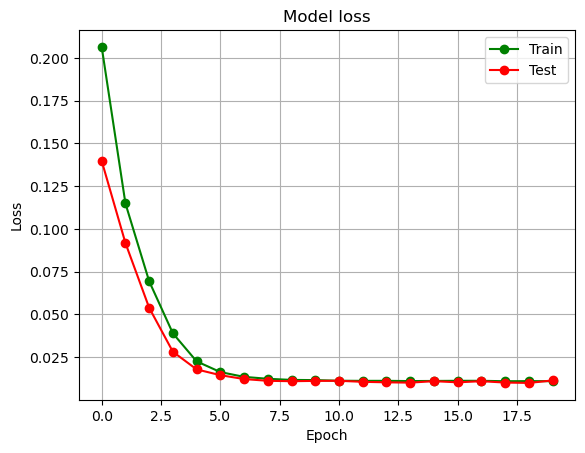

In [63]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'], 'go-')
plt.plot(history.history['val_loss'], 'ro-')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid('true')
plt.show()

63/63 [==============================] - 0s 292us/step


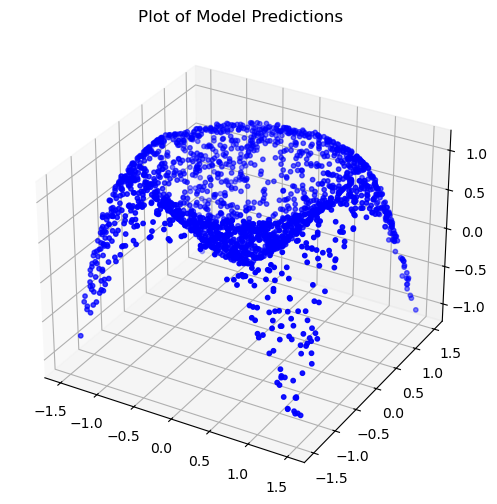

In [64]:
x_predicted = np.random.uniform(-1.5, 1.5,size=(2000, 2))
y_predicted = model1.predict(x_predicted)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_predicted[:, 0], x_predicted[:, 1], y_predicted.flatten(), c='blue', s=10)
plt.title("Plot of Model Predictions")

plt.grid(True)
plt.show()